In [39]:
import numpy as np
import pandas as pd

from nb import edhec_risk_kit_206 as erk

%load_ext autoreload
%autoreload 2
#inds=['Hlth','Fin','Whlsl','Rtail','Food']
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=49)["2014":"2018"]
ind_mcap = erk.get_ind_market_caps(49, weights=True)["2014-1"]

#rets = ind_rets[inds]
rets = ind_rets
cov = rets.cov()

#ind_mcap = ind_mcap[inds]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
def risk_contribution(w,cov):
    """
    Compute the contributions to risk of the constituents of a portfolio, given a set of portfolio weights and a covariance matrix
    """
    total_portfolio_var = erk.portfolio_vol(w,cov)**2
    # Marginal contribution of each constituent
    marginal_contrib = cov@w
    risk_contrib = np.multiply(marginal_contrib,w.T)/total_portfolio_var
    return risk_contrib

In [43]:
risk_contribution(erk.weight_cw(rets, ind_mcap), cov).sort_values(ascending=False)

Banks    0.104060
Softw    0.093745
Oil      0.088914
Drugs    0.084653
Rtail    0.070120
Chips    0.063869
Telcm    0.046113
Other    0.042484
Insur    0.039418
Mach     0.030455
Fin      0.028291
Trans    0.026039
Chems    0.025071
BusSv    0.021816
Hardw    0.018487
Autos    0.016170
Aero     0.014904
LabEq    0.014527
Whlsl    0.013434
MedEq    0.012792
Hshld    0.011568
Paper    0.011139
Meals    0.010572
Food     0.010084
Util     0.009626
Fun      0.009335
ElcEq    0.007693
Cnstr    0.007428
Clths    0.006676
Smoke    0.006470
Soda     0.006309
BldMt    0.006061
Steel    0.005182
Mines    0.004954
Beer     0.004776
Hlth     0.004203
PerSv    0.003219
Agric    0.002886
RlEst    0.002803
Boxes    0.002595
Guns     0.002263
Rubbr    0.001972
Toys     0.001796
Ships    0.001276
Txtls    0.001276
Books    0.001203
Coal     0.000870
FabPr    0.000309
Gold     0.000096
dtype: float64

In [45]:
(0.104060-0.000096)*100

10.3964

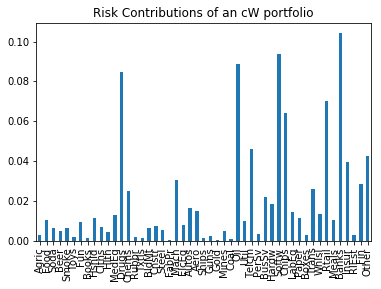

In [46]:
risk_contribution(erk.weight_cw(rets, ind_mcap), cov).plot.bar(title="Risk Contributions of an cW portfolio");

In [47]:
risk_contribution(erk.weight_ew(rets), cov).sort_values(ascending=False)

Steel    0.030938
Ships    0.030005
Coal     0.029025
Mines    0.028641
BldMt    0.028106
Mach     0.027558
FabPr    0.027473
RlEst    0.026693
Txtls    0.026679
ElcEq    0.026376
Chems    0.026042
Boxes    0.025176
Books    0.024772
Cnstr    0.024585
Oil      0.023372
Toys     0.023371
Autos    0.023338
Trans    0.022935
Fin      0.022416
Fun      0.022200
Banks    0.021622
Rubbr    0.021541
LabEq    0.021497
Aero     0.021306
Paper    0.021104
Whlsl    0.020881
BusSv    0.020757
Hardw    0.020570
Chips    0.020140
PerSv    0.019258
Drugs    0.019058
Rtail    0.019039
Insur    0.018249
MedEq    0.017747
Softw    0.017357
Hlth     0.017251
Agric    0.016982
Guns     0.015950
Other    0.015948
Telcm    0.015910
Meals    0.013261
Clths    0.012855
Gold     0.012449
Soda     0.012041
Food     0.011227
Beer     0.010500
Hshld    0.010492
Smoke    0.009393
Util     0.005916
dtype: float64

In [48]:
(0.030938-0.005916)*100

2.5021999999999998

In [49]:
from scipy.optimize import minimize

def target_risk_contributions(target_risk, cov):
    """
    Returns the weights of the portfolio that gives you the weights such
    that the contributions to portfolio risk are as close as possible to
    the target_risk, given the covariance matrix
    """
    n = cov.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def msd_risk(weights, target_risk, cov):
        """
        Returns the Mean Squared Difference in risk contributions
        between weights and target_risk
        """
        w_contribs = risk_contribution(weights, cov)
        return ((w_contribs-target_risk)**2).sum()
    
    weights = minimize(msd_risk, init_guess,
                       args=(target_risk, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

def equal_risk_contributions(cov):
    """
    Returns the weights of the portfolio that equalizes the contributions
    of the constituents based on the given covariance matrix
    """
    n = cov.shape[0]
    return target_risk_contributions(target_risk=np.repeat(1/n,n), cov=cov)

In [53]:
risk_contribution(equal_risk_contributions(cov), cov).sort_values(ascending=False)

Hshld    0.020533
Beer     0.020488
Other    0.020482
RlEst    0.020473
Txtls    0.020472
Telcm    0.020471
Guns     0.020463
Soda     0.020455
Smoke    0.020451
Fun      0.020448
LabEq    0.020443
Food     0.020436
Meals    0.020432
FabPr    0.020426
Banks    0.020424
Rubbr    0.020422
Hlth     0.020422
Softw    0.020422
Mach     0.020421
Fin      0.020421
Oil      0.020417
Autos    0.020417
ElcEq    0.020416
Paper    0.020416
Insur    0.020411
Clths    0.020410
BusSv    0.020410
Agric    0.020410
Coal     0.020409
Aero     0.020408
Chips    0.020408
Chems    0.020408
Hardw    0.020407
Trans    0.020407
Whlsl    0.020393
Books    0.020389
Boxes    0.020387
Toys     0.020386
PerSv    0.020381
Cnstr    0.020380
BldMt    0.020378
MedEq    0.020374
Gold     0.020368
Rtail    0.020365
Drugs    0.020350
Mines    0.020346
Ships    0.020291
Steel    0.020284
Util     0.020168
dtype: float64

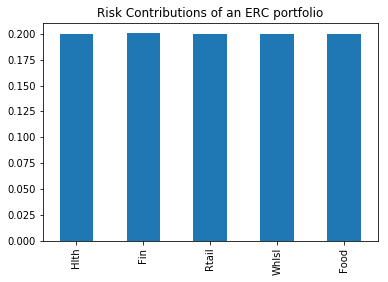

In [21]:
risk_contribution(equal_risk_contributions(cov), cov).plot.bar(title="Risk Contributions of an ERC portfolio");

In [22]:
def weight_erc(r, cov_estimator=erk.sample_cov, **kwargs):
    """
    Produces the weights of the ERC portfolio given a covariance matrix of the returns 
    """
    est_cov = cov_estimator(r, **kwargs)
    return equal_risk_contributions(est_cov)

In [61]:
wgts = erk.weight_erc(ind_rets, cov_estimator=erk.sample_cov)

In [62]:
industries = ind_rets.columns

In [65]:
weights = pd.DataFrame([industries, wgts]).T
weights.columns = ['ind', 'wgt']
weights.sort_values('wgt', ascending=False)

,ind,wgt
30,Util,0.0521557
8,Hshld,0.0331841
4,Smoke,0.0326064
3,Beer,0.0320283
1,Food,0.0302509
9,Clths,0.0291292
2,Soda,0.0282333
43,Meals,0.0279072
26,Gold,0.0272822
25,Guns,0.0238092
